### Peyman Afzali - Deep Learning for Solar Radiation Forecasting
### Shahid Bahonar University of Kerman

In [1]:
### Keras and Tensorflow 
import numpy
import xlrd 
import csv

filename = 'Wind_Speed_Data.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
df1 = numpy.array(x).astype('float')
print(df1.shape)

(8760, 1)


In [2]:
import matplotlib.pyplot as plt
plt.plot(df1);

In [3]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [4]:
import numpy as np

In [5]:
df1

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [4.42813644],
       [4.62791514],
       [8.77953926]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
print(df1)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.09190875]
 [0.09605528]
 [0.18222485]]


In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(5694, 3066)

In [10]:
train_data

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(5593, 100)
(5593,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(2965, 100)
(2965,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)

Train on 5593 samples, validate on 2965 samples
Epoch 1/5
5593/5593 [==============================] - 23s 4ms/sample - loss: 0.0053 - val_loss: 0.0064
Epoch 2/5
5593/5593 [==============================] - 23s 4ms/sample - loss: 0.0053 - val_loss: 0.0062
Epoch 3/5
5593/5593 [==============================] - 23s 4ms/sample - loss: 0.0053 - val_loss: 0.0061
Epoch 4/5
5593/5593 [==============================] - 23s 4ms/sample - loss: 0.0053 - val_loss: 0.0061
Epoch 5/5
5593/5593 [==============================] - 25s 4ms/sample - loss: 0.0053 - val_loss: 0.0061


In [63]:
import tensorflow as tf

In [64]:
tf.__version__

'1.14.0'

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [66]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8.152128926617673

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

8.429491814547502

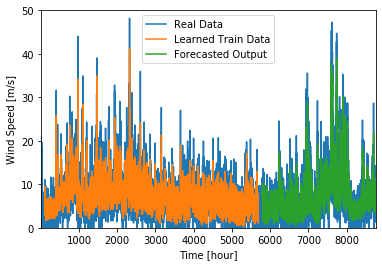

In [99]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
fig, ax = plt.subplots()
plt.plot(np.arange(1,8760),scaler.inverse_transform(df1[1:8760]))
#plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time [hour]')
plt.ylabel('Wind Speed [m/s]')
plt.legend(['Real Data','Learned Train Data','Forecasted Output'],loc=0)
ax.set_xlim([1, 8760])
ax.set_ylim([0, 50])
plt.show()

In [70]:
len(test_data)

3066

In [71]:
x_input=test_data[2966:].reshape(1,-1)
x_input.shape


(1, 100)

In [72]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
#temp_input[temp_input<0] = 0

In [73]:
temp_input

[0.1478767748782401,
 0.12284838789371397,
 0.11144135270746718,
 0.15655082714396393,
 0.07845627428411836,
 0.13865990310436857,
 0.09486690712844771,
 0.17734532573062375,
 0.10334365220268546,
 0.29651415593038816,
 0.2663256889634853,
 0.29828037476688846,
 0.2585796931961946,
 0.21841677175382904,
 0.21230025487840495,
 0.11247438789244621,
 0.3445428383019537,
 0.12724304494361524,
 0.177495185598234,
 0.18269211323362816,
 0.2458198156062628,
 0.2349257956974753,
 0.2925274421125859,
 0.3297174384566855,
 0.26102080223715646,
 0.17963922292773887,
 0.12849008543028484,
 0.20094540303520894,
 0.15701956412908258,
 0.12438562317115857,
 0.15755993849972955,
 0.2026645511587018,
 0.17409319634091444,
 0.1711853775377669,
 0.1690293515707844,
 0.13146879315026286,
 0.13460851506135396,
 0.1224804631726628,
 0.28202596114851397,
 0.24157568447207117,
 0.3140607014087403,
 0.21905192053487513,
 0.39896767521789717,
 0.3512005127201324,
 0.39127327109221705,
 0.3522799396600189,
 0.59

In [74]:
# demonstrate prediction for next 24 hours
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<24):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input[x_input<0] = 0
        print("{} hour input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        yhat[yhat<0] = 0
        print("{} hour output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        x_input[x_input<0] = 0
        yhat = model.predict(x_input, verbose=0)
        yhat[yhat<0] = 0
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.14736189]
101
1 hour input [0.12284839 0.11144135 0.15655083 0.07845627 0.1386599  0.09486691
 0.17734533 0.10334365 0.29651416 0.26632569 0.29828037 0.25857969
 0.21841677 0.21230025 0.11247439 0.34454284 0.12724304 0.17749519
 0.18269211 0.24581982 0.2349258  0.29252744 0.32971744 0.2610208
 0.17963922 0.12849009 0.2009454  0.15701956 0.12438562 0.15755994
 0.20266455 0.1740932  0.17118538 0.16902935 0.13146879 0.13460852
 0.12248046 0.28202596 0.24157568 0.3140607  0.21905192 0.39896768
 0.35120051 0.39127327 0.35227994 0.59510153 0.36199323 0.09627155
 0.08700431 0.05026914 0.07133206 0.088557   0.14898643 0.06165011
 0.14871325 0.06177539 0.         0.06439801 0.23464221 0.04919215
 0.11356665 0.04801449 0.11105377 0.0788278  0.10604249 0.06601045
 0.1916377  0.02086791 0.11189064 0.06379202 0.1346967  0.10254571
 0.06021756 0.11342614 0.09167743 0.10057417 0.07920167 0.16129559
 0.02716647 0.13697576 0.05802322 0.12101141 0.22494814 0.2974613
 0.24637191 0.12901713 0.18676136 

10 hour output [[0.18767217]]
11 hour input [0.29828037 0.25857969 0.21841677 0.21230025 0.11247439 0.34454284
 0.12724304 0.17749519 0.18269211 0.24581982 0.2349258  0.29252744
 0.32971744 0.2610208  0.17963922 0.12849009 0.2009454  0.15701956
 0.12438562 0.15755994 0.20266455 0.1740932  0.17118538 0.16902935
 0.13146879 0.13460852 0.12248046 0.28202596 0.24157568 0.3140607
 0.21905192 0.39896768 0.35120051 0.39127327 0.35227994 0.59510153
 0.36199323 0.09627155 0.08700431 0.05026914 0.07133206 0.088557
 0.14898643 0.06165011 0.14871325 0.06177539 0.         0.06439801
 0.23464221 0.04919215 0.11356665 0.04801449 0.11105377 0.0788278
 0.10604249 0.06601045 0.1916377  0.02086791 0.11189064 0.06379202
 0.1346967  0.10254571 0.06021756 0.11342614 0.09167743 0.10057417
 0.07920167 0.16129559 0.02716647 0.13697576 0.05802322 0.12101141
 0.22494814 0.2974613  0.24637191 0.12901713 0.18676136 0.16825486
 0.21994168 0.17374684 0.07040017 0.03190066 0.07309368 0.0393241
 0.15618    0.16900322 

 0.18766704 0.1844472  0.18054031 0.17666912]
20 hour output [[0.1731528]]
21 hour input [0.2349258  0.29252744 0.32971744 0.2610208  0.17963922 0.12849009
 0.2009454  0.15701956 0.12438562 0.15755994 0.20266455 0.1740932
 0.17118538 0.16902935 0.13146879 0.13460852 0.12248046 0.28202596
 0.24157568 0.3140607  0.21905192 0.39896768 0.35120051 0.39127327
 0.35227994 0.59510153 0.36199323 0.09627155 0.08700431 0.05026914
 0.07133206 0.088557   0.14898643 0.06165011 0.14871325 0.06177539
 0.         0.06439801 0.23464221 0.04919215 0.11356665 0.04801449
 0.11105377 0.0788278  0.10604249 0.06601045 0.1916377  0.02086791
 0.11189064 0.06379202 0.1346967  0.10254571 0.06021756 0.11342614
 0.09167743 0.10057417 0.07920167 0.16129559 0.02716647 0.13697576
 0.05802322 0.12101141 0.22494814 0.2974613  0.24637191 0.12901713
 0.18676136 0.16825486 0.21994168 0.17374684 0.07040017 0.03190066
 0.07309368 0.0393241  0.15618    0.16900322 0.09190875 0.09605528
 0.18222485 0.14736189 0.14804468 0.14901

In [75]:
np.array(temp_input[1:])

array([0.2610208 , 0.17963922, 0.12849009, 0.2009454 , 0.15701956,
       0.12438562, 0.15755994, 0.20266455, 0.1740932 , 0.17118538,
       0.16902935, 0.13146879, 0.13460852, 0.12248046, 0.28202596,
       0.24157568, 0.3140607 , 0.21905192, 0.39896768, 0.35120051,
       0.39127327, 0.35227994, 0.59510153, 0.36199323, 0.09627155,
       0.08700431, 0.05026914, 0.07133206, 0.088557  , 0.14898643,
       0.06165011, 0.14871325, 0.06177539, 0.        , 0.06439801,
       0.23464221, 0.04919215, 0.11356665, 0.04801449, 0.11105377,
       0.0788278 , 0.10604249, 0.06601045, 0.1916377 , 0.02086791,
       0.11189064, 0.06379202, 0.1346967 , 0.10254571, 0.06021756,
       0.11342614, 0.09167743, 0.10057417, 0.07920167, 0.16129559,
       0.02716647, 0.13697576, 0.05802322, 0.12101141, 0.22494814,
       0.2974613 , 0.24637191, 0.12901713, 0.18676136, 0.16825486,
       0.21994168, 0.17374684, 0.07040017, 0.03190066, 0.07309368,
       0.0393241 , 0.15618   , 0.16900322, 0.09190875, 0.09605

In [125]:
hour_new=np.arange(1,101)
hour_pred=np.arange(101,125)

In [126]:
import matplotlib.pyplot as plt

In [127]:
len(df1)

8760

[[0.1473618894815445],
 [0.1480446755886078],
 [0.14901937544345856],
 [0.1516238898038864],
 [0.155594602227211],
 [0.16073068976402283],
 [0.16650556027889252],
 [0.1725873202085495],
 [0.17837248742580414],
 [0.18355746567249298],
 [0.18767216801643372],
 [0.19068418443202972],
 [0.19252677261829376],
 [0.19315651059150696],
 [0.1925269067287445],
 [0.1907438337802887],
 [0.18766704201698303],
 [0.18444719910621643],
 [0.1805403083562851],
 [0.17666912078857422],
 [0.17315280437469482],
 [0.1704052984714508],
 [0.16854172945022583],
 [0.16770924627780914]]

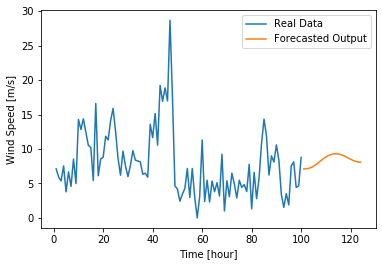

In [128]:
plt.plot(hour_new,scaler.inverse_transform(df1[8660:]))
plt.plot(hour_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Time [hour]')
plt.ylabel('Wind Speed [m/s]')
plt.legend(["Real Data","Forecasted Output"])
lst_output

(4, 12)

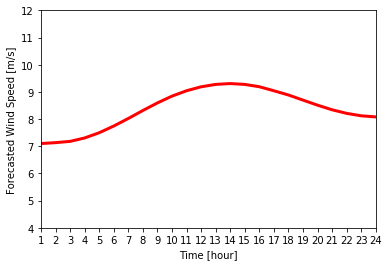

In [138]:
fig, ax = plt.subplots()
dim=np.arange(1,25,1)
plt.plot(np.arange(1,25),scaler.inverse_transform(lst_output),'r-', linewidth=3)
plt.xlabel('Time [hour]')
plt.ylabel('Forecasted Wind Speed [m/s]')
plt.xticks(dim)
ax.set_xlim([1, 24])
ax.set_ylim([4, 12])

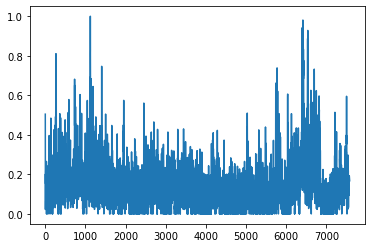

In [130]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

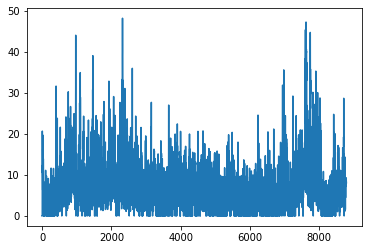

In [83]:
plt.plot(df3)